<div class="alert alert-success">
<h3> Will be transated...</h3>

</div>

# Разработка модели прогноза оттока клиентов оператора связи «Ниединогоразрыва.ком»

Поставлена задача научиться прогнозировать отток клиентов оператора связи «Ниединогоразрыва.ком». При наличии сведений, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Представлены персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

#### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

#### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.


---
<a id='the_contents'></a>
#### Исследование состоит из 3 частей.

##### Часть 1. Исследовательский анализ и подготовка данных.
* [1.1 Импорт библиотек.](#the_part_1.1)
* [1.2 Загрузка файла.](#the_part_1.2)
* [1.3 Анализ датасета с данными договора.](#the_part_1.3)
* [1.4 Анализ датасета с персональными данными клиента.](#the_part_1.4)
* [1.5 Анализ датасета с  данными об интернет-услугах.](#the_part_1.5)
* [1.6 Анализ датасета с данными об услугах телефонии.](#the_part_1.6)
* [1.7 Подготовка данных.](#the_part_1.7)

##### Часть 2. Исследование моделей.
* [2.1 Модель случайного леса.](#the_part_2.1)
* [2.2 Модель логистической регрессии.](#the_part_2.2)

##### Часть 3. Заключение.
* [Выводы по исследованию.](#the_part_3)
---

## Часть 1. Исследовательский анализ данных

<a id='the_part_1.1'></a>
### 1.1. Импорт библиотек, загрузка файла, изучение общей информации

In [1]:
# Импортируем необходимые для проекта библиотеки
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import scipy.stats as ss
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

<a id='the_part_1.2'></a>
### 1.2. Загрузка файлов

In [3]:
# Загружаем файлы данных
try:
    df_con = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Финальный проект\final_provider\contract.csv')
    df_per = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Финальный проект\final_provider\personal.csv')
    df_int = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Финальный проект\final_provider\internet.csv')
    df_pho = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Финальный проект\final_provider\phone.csv')
except:
    try:
        df_con = pd.read_csv('/datasets/final_provider/contract.csv')
        df_int = pd.read_csv('/datasets/final_provider/internet.csv')
        df_per = pd.read_csv('/datasets/final_provider/personal.csv')
        df_pho = pd.read_csv('/datasets/final_provider/phone.csv')
    except:
        df_con = pd.read_csv('https://C:/datasets/final_provider/contract.csv')
        df_per = pd.read_csv('https://C:/datasets/final_provider/personal.csv')
        df_int = pd.read_csv('https://C:/datasets/final_provider/internet.csv')
        df_pho = pd.read_csv('https://C:/datasets/final_provider/phone.csv')

<a id='the_part_1.3'></a>
### 1.3. Анализ датасета с данными договора

In [4]:
# Общая информация датасета с данными договора
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
# Посмотрим на датасет с данными договора
display(df_con.head(5))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


#### Посмотрим на структуру данных.

In [6]:
# Выведем количество разных customerID
display(df_con['customerID'].value_counts())

1626-ERCMM    1
1116-FRYVH    1
6682-VCIXC    1
4583-PARNH    1
3082-VQXNH    1
             ..
7018-FPXHH    1
2055-SIFSS    1
6770-UAYGJ    1
6522-OIQSX    1
0336-PIKEI    1
Name: customerID, Length: 7043, dtype: int64

##### Идентификаторы клиента customerID уникальны, повторов нет.

In [7]:
# Выведем количество разных EndDate
display(df_con['EndDate'].value_counts())

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

##### Наблюдается дисбаланс классов. Класс "No" встречается 5174 раза, общее количество объектов 7043.

In [8]:
# Выведем количество разных Type
display(df_con['Type'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [9]:
# Выведем количество разных PaperlessBilling
display(df_con['PaperlessBilling'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [10]:
# Выведем количество разных PaymentMethod
display(df_con['PaymentMethod'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [11]:
# Определим функцию анализа пропущенных данных
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total missing data', 'Percent missing data'])

In [12]:
# Преобразуем столбец TotalCharges в числа
df_con['TotalCharges'] = pd.to_numeric(df_con['TotalCharges'], errors='coerce')

In [13]:
display(missing_data(df_con))

,Total missing data,Percent missing data
TotalCharges,11,0.156183
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Type,0,0.000000
EndDate,0,0.000000
BeginDate,0,0.000000
customerID,0,0.000000


In [14]:
display(df_con[df_con['TotalCharges'].isnull()])

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


##### Имеется незначительное количество пропущенных значений в столбце `TotalCharges`.  Из таблицы видим, что это только что подключившиеся клиенты. Заполним пропущенные значения нулями.

In [15]:
# Заполняем пропущенные значения нулями
df_con['TotalCharges'].fillna(0, inplace=True)

#### Посмотрим на распределение выплат.

In [16]:
# Выведем статистику по числовым данным
display(df_con.describe().T)

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


<AxesSubplot:>

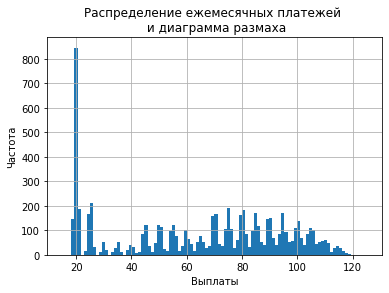

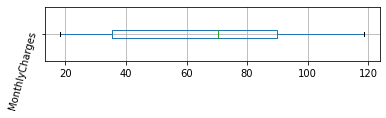

In [17]:
# Посмотрим распределение MonthlyCharges
display(df_con['MonthlyCharges'].hist(bins=100, range=(15, 125)))
plt.title('Распределение ежемесячных платежей \n и диаграмма размаха')
plt.xlabel('Выплаты')
plt.ylabel('Частота')
plt.show()
plt.figure(figsize=(6, 1))
df_con.boxplot('MonthlyCharges', vert=False, rot=75)
plt.show()

<AxesSubplot:>

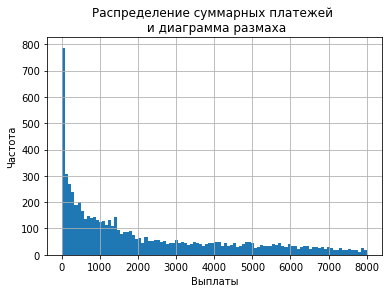

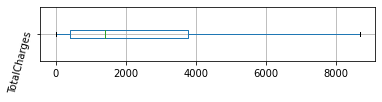

In [18]:
# Посмотрим распределение TotalCharges
display(df_con['TotalCharges'].hist(bins=100, range=(15, 8000)))
plt.title('Распределение суммарных платежей \n и диаграмма размаха')
plt.xlabel('Выплаты')
plt.ylabel('Частота')
plt.show()
plt.figure(figsize=(6, 1))
df_con.boxplot('TotalCharges', vert=False, rot=75)
plt.show()

In [19]:
# Поиск дубликатов
print('Дубликаты:', df_con.duplicated().sum()) 

Дубликаты: 0


<a id='the_part_1.4'></a>
### 1.4. Анализ датасета с персональными данными клиента

In [20]:
# Общая информация датасета с персональными данными
df_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [21]:
# Посмотрим на датасет с персональными данными
display(df_per.head(5))

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


#### Посмотрим на структуру данных.

In [22]:
# Выведем количество разных gender
display(df_per['gender'].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64

In [23]:
# Выведем количество разных SeniorCitizen
display(df_per['SeniorCitizen'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [24]:
# Выведем количество разных Partner
display(df_per['Partner'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64

In [25]:
# Выведем количество разных Dependents
display(df_per['Dependents'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [26]:
display(missing_data(df_per))

,Total missing data,Percent missing data
Dependents,0,0.0
Partner,0,0.0
SeniorCitizen,0,0.0
gender,0,0.0
customerID,0,0.0


In [27]:
# Поиск дубликатов
print('Дубликаты:', df_per.duplicated().sum())

Дубликаты: 0


<a id='the_part_1.5'></a>
### 1.5. Анализ датасета с  данными об интернет-услугах

In [28]:
# Общая информация датасета интернет-услуг
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [29]:
# Посмотрим на датасет интернет-услуг
display(df_int.head(5))

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


#### Посмотрим на структуру данных.

In [30]:
# Выведем количество разных InternetService
display(df_int['InternetService'].value_counts())

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

In [31]:
# Выведем количество разных OnlineSecurity
display(df_int['OnlineSecurity'].value_counts())

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

In [32]:
# Выведем количество разных OnlineBackup
display(df_int['OnlineBackup'].value_counts())

No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

In [33]:
# Выведем количество разных DeviceProtection
display(df_int['DeviceProtection'].value_counts())

No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

In [34]:
# Выведем количество разных TechSupport
display(df_int['TechSupport'].value_counts())

No     3473
Yes    2044
Name: TechSupport, dtype: int64

In [35]:
# Выведем количество разных StreamingTV
display(df_int['StreamingTV'].value_counts())

No     2810
Yes    2707
Name: StreamingTV, dtype: int64

In [36]:
# Выведем количество разных StreamingMovies
display(df_int['StreamingMovies'].value_counts())

No     2785
Yes    2732
Name: StreamingMovies, dtype: int64

In [37]:
display(missing_data(df_int))

,Total missing data,Percent missing data
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0
DeviceProtection,0,0.0
OnlineBackup,0,0.0
OnlineSecurity,0,0.0
InternetService,0,0.0
customerID,0,0.0


In [38]:
# Поиск дубликатов
print('Дубликаты:', df_int.duplicated().sum())

Дубликаты: 0


<a id='the_part_1.6'></a>
### 1.6. Анализ датасета с  данными об услугах телефонии

In [39]:
# Общая информация датасета телефонии
df_pho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [40]:
# Посмотрим на датасет телефонии
display(df_pho.head(5))

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


#### Посмотрим на структуру данных.

In [41]:
# Выведем количество разных MultipleLines
display(df_pho['MultipleLines'].value_counts())

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

In [42]:
display(missing_data(df_pho))

,Total missing data,Percent missing data
MultipleLines,0,0.0
customerID,0,0.0


In [43]:
# Поиск дубликатов
print('Дубликаты:', df_pho.duplicated().sum())

Дубликаты: 0


<a id='the_part_1.7'></a>
### 1.7. Подготовка данных

#### Формируем целевой признак.

In [44]:
# Создаем столбец признака и заполняем его: если EndDate не равен "No" (клиент остался), то "1", иначе "0"
df_con['Exited'] =  df_con['EndDate']
df_con.loc[df_con['Exited'] != 'No', 'Exited'] = 1
df_con.loc[df_con['Exited'] == 'No', 'Exited'] = 0
df_con['Exited'] = df_con['Exited'].astype(int)

#### Добавляем признак длительности действия договора.

In [45]:
# Преобразуем в формат datetime
df_con['BeginDate'] =  pd.to_datetime(df_con['BeginDate'], format='%Y-%m-%d')
df_con['EndDate_DT'] =  pd.to_datetime(df_con['EndDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [46]:
# Вычисляем сколько дней продлился договор отключившихся клиентов
df_con['Duration'] = (df_con['EndDate_DT'] - df_con['BeginDate']).dt.days.astype('Int64')
df_con['Duration'].fillna((pd.to_datetime('20200201', format='%Y%m%d') - df_con['BeginDate']). \
                           dt.days.astype('Int64'), inplace=True)

In [47]:
# Удаляем лишние столбцы
df_con.drop(['BeginDate', 'EndDate', 'EndDate_DT'], axis=1, inplace=True)

In [48]:
display(df_con.head(5))

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,Duration
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61


#### Создадим общий датасет.

In [49]:
# Объединяем таблицы
df_all = df_con.merge(df_per, left_on='customerID', right_on='customerID', how='left'). \
                merge(df_int, left_on='customerID', right_on='customerID', how='left'). \
                merge(df_pho, left_on='customerID', right_on='customerID', how='left')

# Удаляем столбец customerID
df_all.drop(['customerID'], axis=1, inplace=True)

In [50]:
# Смотрим результат
display(df_all.head(5))

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,Duration,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,One year,No,Mailed check,56.95,1889.50,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


#### Посмотрим на пропущенные значения в объединенном датасете.

In [51]:
# Выводим пропущенные значения
display(missing_data(df_all))

,Total missing data,Percent missing data
StreamingTV,1526,21.666903
TechSupport,1526,21.666903
DeviceProtection,1526,21.666903
OnlineBackup,1526,21.666903
OnlineSecurity,1526,21.666903
InternetService,1526,21.666903
StreamingMovies,1526,21.666903
MultipleLines,682,9.683374
Exited,0,0.000000
PaperlessBilling,0,0.000000


In [52]:
# Поменяем тип признака SeniorCitizen на строковый для обработки техникой OHE
df_all['SeniorCitizen'] = df_all['SeniorCitizen'].apply(str)

#### Добавляем признаки наличия интернета и телефонии.

In [53]:
# Создаем дополнительные столбцы
booleanDictionary = {True: 'TRUE', False: 'FALSE'}
df_all['IsInet'] =  df_all['InternetService'].isnull().map(booleanDictionary)
df_all['IsPhone'] =  df_all['MultipleLines'].isnull().map(booleanDictionary)

In [54]:
# Заполняем пропущенные значения признаком "No" (нет данных в базе - нет услуги)
df_all.fillna('No', inplace=True)

#### Посмотрим на корреляцию числовых признаков.

In [55]:
# Таблица корреляций
display(df_all.corr())

,MonthlyCharges,TotalCharges,Exited,Duration
MonthlyCharges,1.000000,0.651174,0.193356,0.247754
TotalCharges,0.651174,1.000000,-0.198324,0.826109
Exited,0.193356,-0.198324,1.000000,-0.352673
Duration,0.247754,0.826109,-0.352673,1.000000


##### Присутствует мультиколлинеарность, признак `TotalCharges` использовать в рабочей модели не будем.

#### Посмотрим на корреляцию категориальных признаков.

In [56]:
# Создаем список категориальных признаков
categorical_columns = [c for c in df_all.columns if df_all[c].dtype.name == 'object']
categorical_columns.append('Exited')

In [57]:
# Выполним кодировку
label = LabelEncoder()
data_encoded = pd.DataFrame()
for i in categorical_columns:
    data_encoded[i]=label.fit_transform(df_all[i])
data_encoded.head()

,Type,PaperlessBilling,PaymentMethod,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,IsInet,IsPhone,Exited
0,0,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,1,0,3,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0,1,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0
4,0,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [58]:
# Функция вычисления статистики V Крамера
def cramers_V(var1,var2):
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    chi2 = ss.chi2_contingency(crosstab)[0]
    n = np.sum(crosstab)
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [59]:
# Построим таблицу корреляций
rows= []
for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers =cramers_V(data_encoded[var1], data_encoded[var2])
        col.append(round(cramers,2))
    rows.append(col)

cramers_results = np.array(rows)
df_corcat = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
df_corcat

,Type,PaperlessBilling,PaymentMethod,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,IsInet,IsPhone,Exited
Type,1.00,0.18,0.27,0.00,0.14,0.30,0.24,0.21,0.25,0.16,0.23,0.30,0.11,0.12,0.11,0.24,0.00,0.41
PaperlessBilling,0.18,1.00,0.25,0.00,0.16,0.01,0.11,0.38,0.00,0.13,0.10,0.04,0.22,0.21,0.16,0.32,0.01,0.19
PaymentMethod,0.27,0.25,1.00,0.00,0.19,0.16,0.15,0.31,0.17,0.19,0.20,0.18,0.25,0.25,0.23,0.36,0.00,0.30
gender,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SeniorCitizen,0.14,0.16,0.19,0.00,1.00,0.01,0.21,0.26,0.04,0.07,0.06,0.06,0.10,0.12,0.14,0.18,0.00,0.15
Partner,0.30,0.01,0.16,0.00,0.01,1.00,0.45,0.00,0.14,0.14,0.15,0.12,0.12,0.12,0.14,0.00,0.01,0.15
Dependents,0.24,0.11,0.15,0.00,0.21,0.45,1.00,0.18,0.08,0.02,0.01,0.06,0.01,0.04,0.02,0.14,0.00,0.16
InternetService,0.21,0.38,0.31,0.00,0.26,0.00,0.18,1.00,0.39,0.38,0.38,0.39,0.44,0.44,0.37,1.00,0.45,0.32
OnlineSecurity,0.25,0.00,0.17,0.01,0.04,0.14,0.08,0.39,1.00,0.28,0.27,0.35,0.18,0.19,0.10,0.33,0.09,0.17
OnlineBackup,0.16,0.13,0.19,0.01,0.07,0.14,0.02,0.38,0.28,1.00,0.30,0.29,0.28,0.27,0.20,0.38,0.05,0.08


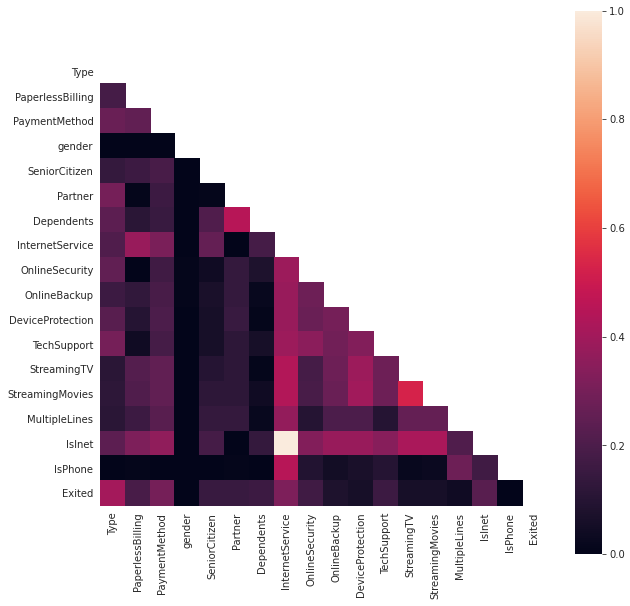

In [60]:
# Построим таблицу корреляций
mask = np.zeros_like(df_corcat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    plt.subplots(figsize=(10,10))
    ax = sns.heatmap(df_corcat, mask=mask, vmin=0., vmax=1, square=True)

plt.show()

##### Имеются взаимозависимые признаки. Добавленный признак 'IsInet' полностью коррелирует с 'InternetService' , его использовать в модели не будем. С целевым признаком лучше всего коррелируют 'Type',  'PaymentMethod' и 'InternetService'. Для принятия окончательного решения о выборе признаков оценим важность признаков при построении модели случайного леса.

In [61]:
# Удаляем лишние столбцы
df_all.drop(['TotalCharges', 'IsInet'], axis=1, inplace=True)

#### Обработка категориальных признаков техникой One-Hot Encoding.

In [62]:
# Смотрим на типы данных
display(df_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   Exited            7043 non-null   int32  
 5   Duration          7043 non-null   Int64  
 6   gender            7043 non-null   object 
 7   SeniorCitizen     7043 non-null   object 
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


None

In [63]:
# Применяем метод get_dummies
df_ohe = pd.get_dummies(df_all, drop_first=True)

In [64]:
# Смотрим результат
display(df_ohe.head(5))

,MonthlyCharges,Exited,Duration,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,IsPhone_TRUE
0,29.85,0,31,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56.95,0,1036,1,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
2,53.85,1,61,0,0,1,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
3,42.30,0,1371,1,0,0,0,0,0,1,...,0,0,1,0,1,1,0,0,0,1
4,70.70,1,61,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Разделим данные на обучающую / тестовую выборки в соотношении 75% / 25%.

In [65]:
# Выделяем признаки из набора данных
features = df_ohe.drop('Exited', axis=1)
# Выделяем целевой признак
target = df_ohe['Exited']

# Делим данные на обучающую-тестовую выборки в соотношении 75%-25%
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                            test_size=0.25, random_state=12345, stratify=target)

#### Проверим баланс классов в обучающей выборке.

0    0.73457
1    0.26543
Name: Exited, dtype: float64

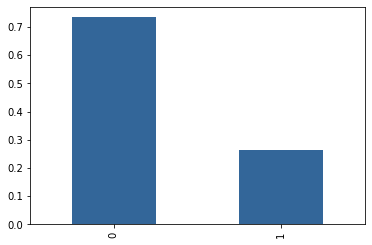

Отношение «1» к «0» в целевом признаке: 0.361340206185567


In [66]:
# Посчитаем и выведем баланс классов
class_frequency = target_train.value_counts(normalize=True)
display(class_frequency)

# Строим столбчатую диаграмму
class_frequency.plot(kind='bar', color='#336699')
plt.show()

# Считаем отношение «1» к «0» в целевом признаке
print('Отношение «1» к «0» в целевом признаке:', class_frequency[1] / class_frequency[0])

#### Запомним долю отрицательного класса в обучающей выборке. Используем ее в дальнейшем для вычисления порога классификации, полагая, что в продакшн баланс классов сохранится. В тестовой выборке сохранение баланса мы обеспечили задав `stratify`.

In [67]:
# Запоминаем долю отрицательного класса
part_neg = class_frequency[0]

## Часть 2. Исследование моделей

<a id='the_part_2.1'></a>
### 2.1. Модель случайного леса

#### Построим модель на всех признаках и оценим их важность с помощью feature_importances_.

#### Выполним нормализацию.

In [68]:
# Столбцы с числовыми данными
numeric = ['Duration', 'MonthlyCharges']

# Выполнение стандартизации
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_test.loc[:, numeric] = scaler.transform(features_test[numeric])

C:\Users\iserg\Anaconda3\envs\Env1\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\iserg\Anaconda3\envs\Env1\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [69]:
# Строим модель случайного леса, подбираем гиперпараметры Гридсёрчем
model_rfc = RandomForestClassifier(random_state=12345, class_weight='balanced')
param_grid={'n_estimators': range(50, 101, 10),
            'max_depth': range(6, 11, 2)}
gs = GridSearchCV(model_rfc, param_grid,
                  scoring='roc_auc', cv=5)
gs.fit(features_train, target_train)
display(gs.best_params_)
display(gs.best_score_)
# results = gs.cv_results_

{'max_depth': 8, 'n_estimators': 100}

0.8570015287684946

In [70]:
# Строим модель на подобранных параметрах
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=8, class_weight='balanced')
model_rfc.fit(features_train, target_train)

# Вычисляем целевую метрику
print("Auc_ROC:", roc_auc_score(target_test, model_rfc.predict_proba(features_test)[:,1]).round(3))

Auc_ROC: 0.853


#### Посмотрим на значимость признаков.

In [71]:
# Прочитаем поле feature_importances_
importances = model_rfc.feature_importances_
indices = np.argsort(importances)[::-1]

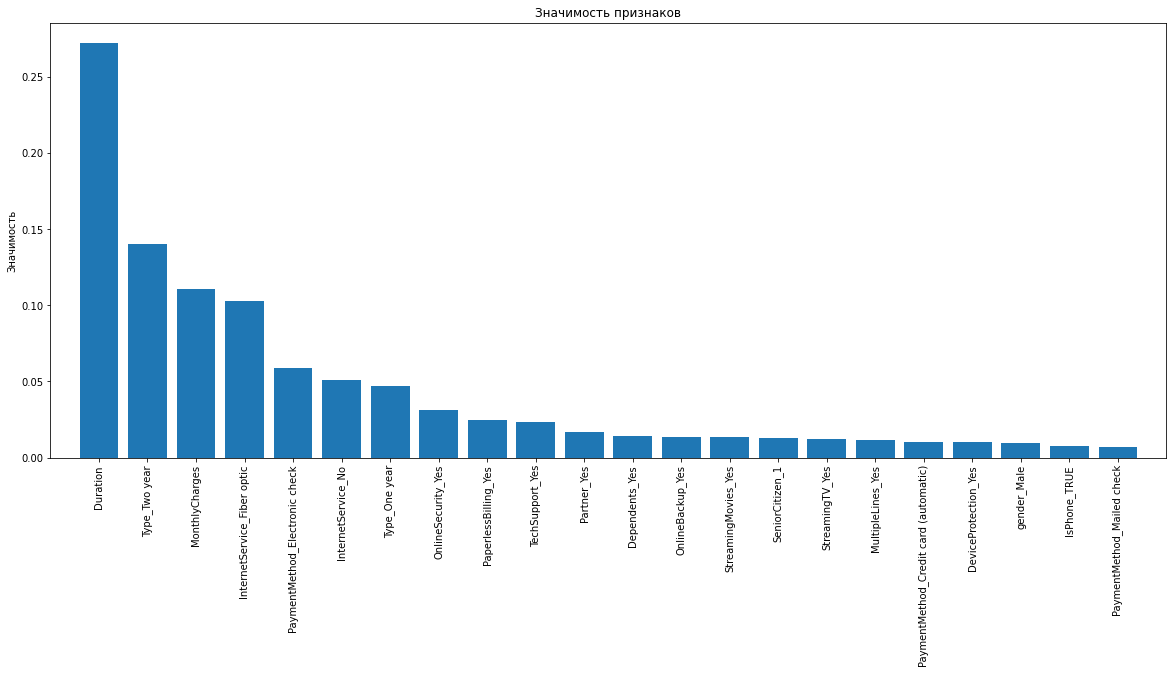

In [72]:
# Построим график значимости признаков
d_first = 22
plt.figure(figsize=(20, 8))
plt.title("Значимость признаков")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(features_train.columns)[indices[:d_first]], rotation=90)
plt.ylabel('Значимость')
plt.xlim([-1, d_first]);

#### Выберем для построения модели два признака с учетом проведенного выше анализа.

In [73]:
# Собираем датафрейм из выбранных признаков
df_sel = df_ohe[['Exited', 'Duration', 'Type_Two year']]

In [74]:
# Посмотрим результат
df_sel.head(3)

,Exited,Duration,Type_Two year
0,0,31,0
1,0,1036,0
2,1,61,0


In [75]:
# Выделяем признаки из набора данных
features = df_sel.drop('Exited', axis=1)
# Выделяем целевой признак
target = df_sel['Exited']

# Делим данные на обучающую-тестовую выборки в соотношении 75%-25%
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                            test_size=0.25, random_state=12345, stratify=target)

In [76]:
# Столбцы с числовыми данными
numeric = ['Duration']

# Выполнение стандартизации
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_test.loc[:, numeric] = scaler.transform(features_test[numeric])

C:\Users\iserg\Anaconda3\envs\Env1\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\iserg\Anaconda3\envs\Env1\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [77]:
# Строим модель случайного леса, подбираем гиперпараметры Гридсёрчем
model_rfc = RandomForestClassifier(random_state=12345, class_weight='balanced')
param_grid={'n_estimators': range(90, 151, 10),
            'max_depth': range(20, 30, 1)}
gs = GridSearchCV(model_rfc, param_grid,
                  scoring='roc_auc', cv=5)
gs.fit(features_train, target_train)
display(gs.best_params_)
display(gs.best_score_)
# results = gs.cv_results_

{'max_depth': 28, 'n_estimators': 150}

0.9240479395201234

In [78]:
# Строим модель на подобранных параметрах
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=150, max_depth=28, class_weight='balanced')
model_rfc.fit(features_train, target_train)

# Вычисляем целевую метрику
print("Auc_ROC:", roc_auc_score(target_test, model_rfc.predict_proba(features_test)[:,1]).round(3))

Auc_ROC: 0.921


##### Получена целевая метрика Auc_ROC = 0,921

#### Посмотрим на распределение классов в ответах модели.

0    0.679727
1    0.320273
dtype: float64

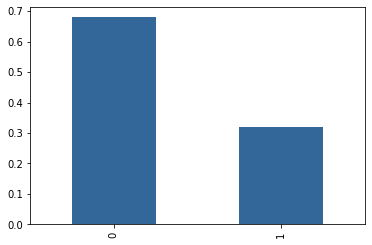

In [79]:
# Посчитаем и выведем баланс классов
predicted_test = model_rfc.predict(features_test)
class_frequency = pd.Series(predicted_test).value_counts(normalize=True)
display(class_frequency)

# Строим столбчатую диаграмму
class_frequency.plot(kind='bar', color='#336699')
plt.show()

#### Вычислим accuracy

#### Accuracy для порога классификации 0,5.

In [80]:
# Вычисление accuracy для порога 0.5
print("Accuracy:", model_rfc.score(features_test, target_test).round(3))

Accuracy: 0.848


#### Accuracy для подобранного порога классификации.

In [81]:
# Получим предсказания модели
predicted_test = model_rfc.predict_proba(features_test)[:,1]

In [82]:
# Вычисляем порог классификации исходя из распределения положительных и отрицательных классов в тестовой выборке
cutoff = sorted(predicted_test)[int(len(predicted_test)*part_neg)]
cutoff

0.6039134029604428

In [83]:
# Получим ответы модели исходя из полученного порога
answ_rfc = (model_rfc.predict_proba(features_test)[:,1]>cutoff).astype(int)
# Посмотрим на долю положительного класса в полученных ответах
answ_rfc.mean()

0.25496876774559907

##### Доля положительного класса в ответах модели близка к доле положительного класса в обучающей выборке.

 #### Вычислим accuracy на ответах модели с учетом выбранного порога классификации.

In [84]:
# Вычисляем accuracy
print("Accuracy:", accuracy_score(target_test, answ_rfc).round(3))

Accuracy: 0.869


##### Accuracy выросла на 2,5%

 #### Вычислим точность и полноту.

In [85]:
print("Точность:", precision_score(target_test, answ_rfc))

Точность: 0.7639198218262806


In [86]:
print("Полнота:", recall_score(target_test, answ_rfc))

Полнота: 0.734475374732334


#### Построим ROC-кривую.

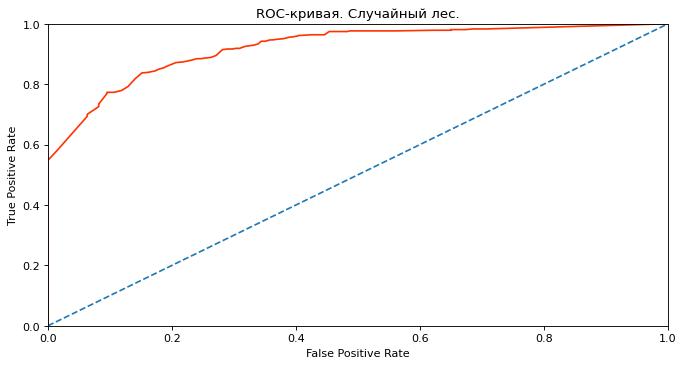

In [87]:
# Строим график ROC-кривой
fpr, tpr, thresholds = roc_curve(target_test, predicted_test)
plt.figure(figsize=(10, 5), dpi= 80)
plt.plot(fpr, tpr, label = 'Без учета дисбаланса', color='#FF3300')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая. Случайный лес.')
plt.plot([0, 1], [0, 1], linestyle='--')

##### Модель неплохо классифицирует объекты. TPR растет до 0,5 без увеличения FPR. Только после TPR=0,6  начинается заметный рост FPR.

<a id='the_part_2.2'></a>
### 2.2. Модель логистической регрессии

In [88]:
# Строим модель логистической регрессии
model_lor = LogisticRegression(random_state=12345, solver='lbfgs', class_weight='balanced')
model_lor.fit(features_train, target_train)

# Вычисляем целевую метрику
print("Auc_ROC:", roc_auc_score(target_test, model_lor.predict_proba(features_test)[:,1]).round(3))

Auc_ROC: 0.769


#### Посмотрим на распределение классов в ответах модели.

1    0.551391
0    0.448609
dtype: float64

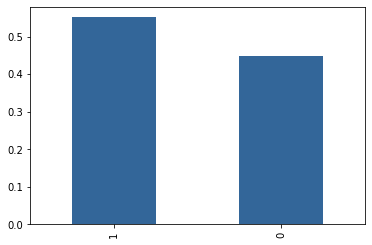

In [89]:
# Посчитаем и выведем баланс классов
predicted_test = model_lor.predict(features_test)
class_frequency = pd.Series(predicted_test).value_counts(normalize=True)
display(class_frequency)

# Строим столбчатую диаграмму
class_frequency.plot(kind='bar', color='#336699')
plt.show()

#### Вычислим accuracy

#### Accuracy для порога классификации 0,5.

In [90]:
# Вычисление accuracy для порога классификации 0.5
print("Accuracy:", model_lor.score(features_test, target_test).round(3))

Accuracy: 0.622


#### Accuracy для подобранного порога классификации.

In [91]:
# Получим предсказания модели
predicted_test = model_lor.predict_proba(features_test)[:,1]

In [92]:
# Вычисляем порог классификации исходя из распределения положительных и отрицательных классов в тестовой выборке
cutoff = sorted(predicted_test)[int(len(predicted_test)*part_neg)]
cutoff

0.6664931384983245

In [93]:
# Получим ответы модели исходя из полученного порога
answ_lor = (model_lor.predict_proba(features_test)[:,1]>cutoff).astype(int)

# Посмотрим на долю положительного класса в полученных ответах
answ_lor.mean()

0.2617830777967064

##### Доля положительного класса в ответах модели близка к доле положительного класса в обучающей выборке.

 #### Вычислим accuracy на ответах модели с учетом выбранного порога классификации.

In [94]:
# Вычисляем accuracy
print("Accuracy:", accuracy_score(target_test, answ_lor).round(3))

Accuracy: 0.746


##### Accuracy выросла на 19,9%

#### Построим ROC-кривую.

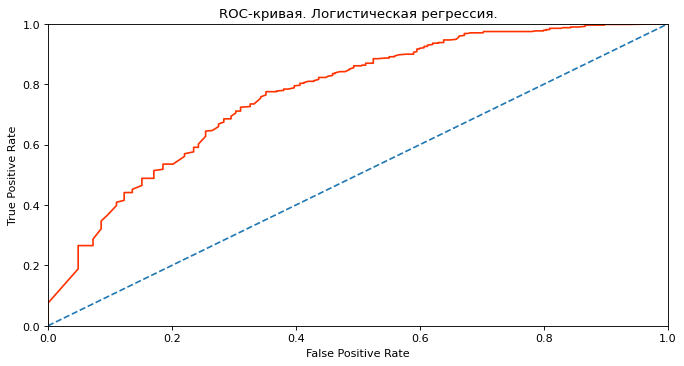

In [95]:
# Строим график ROC-кривой
fpr, tpr, thresholds = roc_curve(target_test, predicted_test)
plt.figure(figsize=(10, 5), dpi= 80)
plt.plot(fpr, tpr, label = 'Без учета дисбаланса', color='#FF3300')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая. Логистическая регрессия.')
plt.plot([0, 1], [0, 1], linestyle='--')

##### ROC-кривая логистической регрессии наглядно показывает, что эта модель хуже классифицирует объекты, чем модель случайного леса.

## Часть 3. Заключение.

<a id='the_part_3'></a>
### Выводы по исследованию.

1. В исследовании рассмотрены две модели:
 - случайный лес (RandomForestClassifier)
 - логистическая регрессия (LogisticRegression)


2. Лучшая целевая метрика достигнута на модели случайного леса, получен Auc_ROC = 0,921.
3. Лучшая метрика Accuracy получена при пороге классификации 0,6039 и составила 0,869. Точность и полнота для лучшей модели составили 0,7639 и 0,7344 соответственно.
4. Цели задачи достигнуты при использовании всего двух признаков. Использование остальных признаков ухудшают работу модели.
5. Задача решена без применения сложных моделей (XGBoost, LGBM, CatBoost), благодаря чему гарантируется быстрая работа модели в продакшн.
6. Возможны следующие доработки:
 - анализ чувствительности модели к изменившимся распределениям в данных и переопределение важных признаков по полученным результатам
 - углубленный анализ бизнес-задачи и факторов влияния, дополнительная настройка модели